In [450]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [451]:
df = pd.read_csv("wine.csv")
print(df.shape)
print(df.info())
df.head()

(178, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# 1. EDA

In [452]:
# 1. Discarding null and duplicated rows

print(df.isnull().sum())
print(df.duplicated().sum())

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64
0


In [453]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


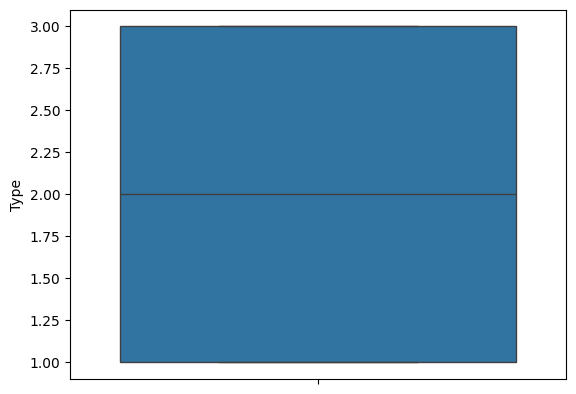

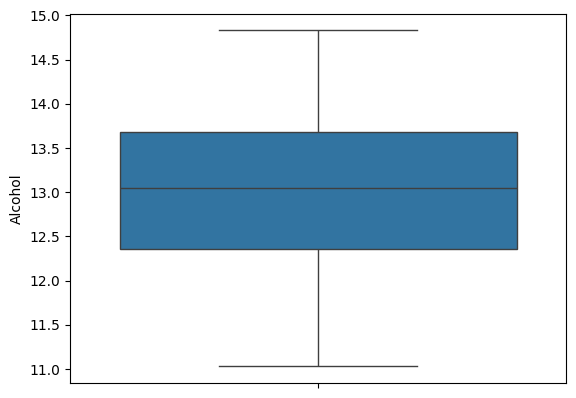

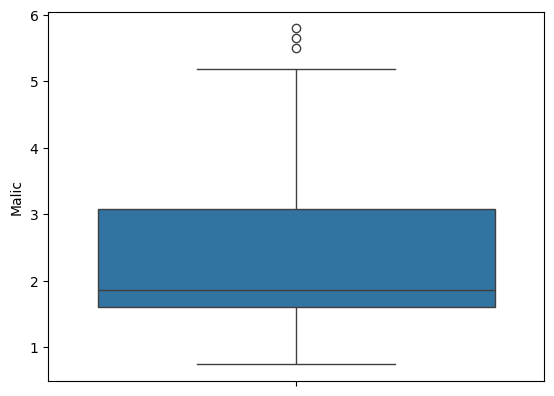

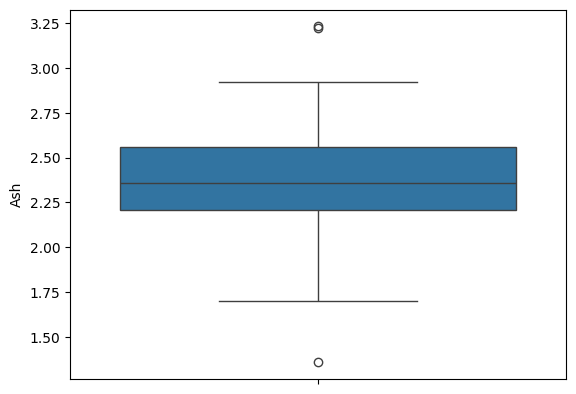

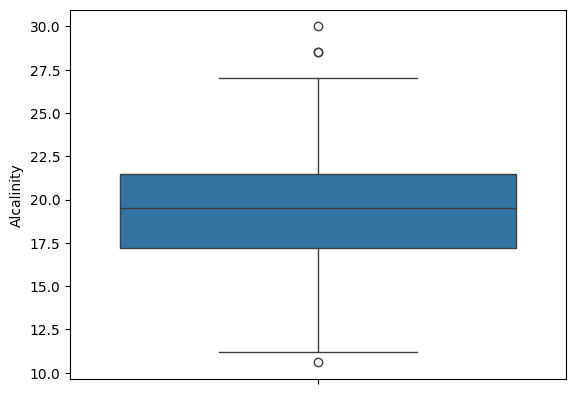

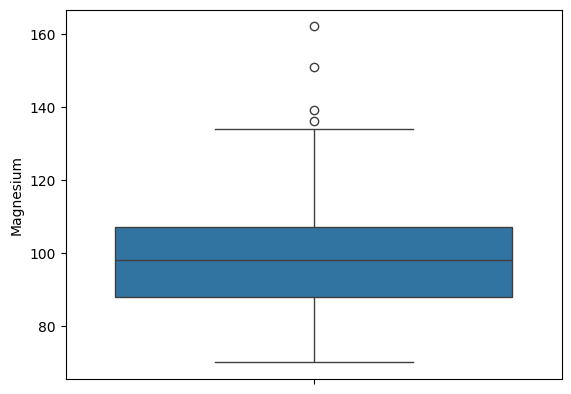

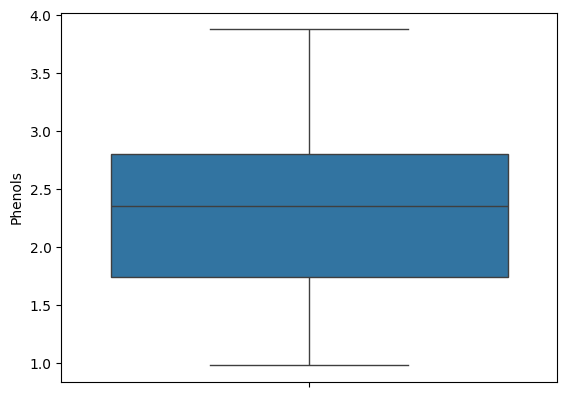

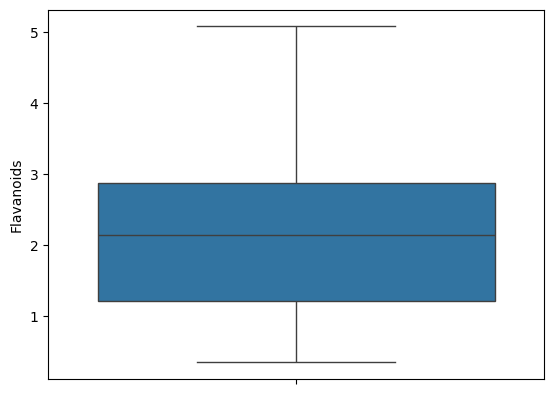

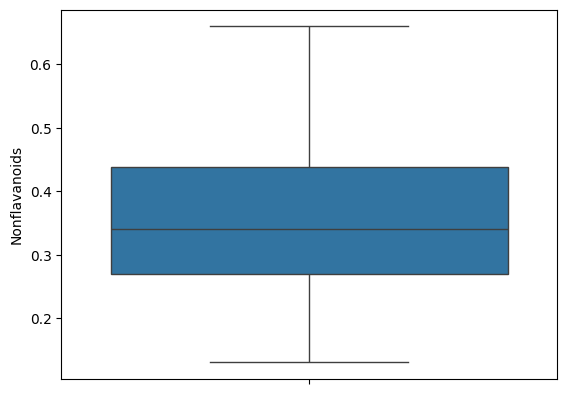

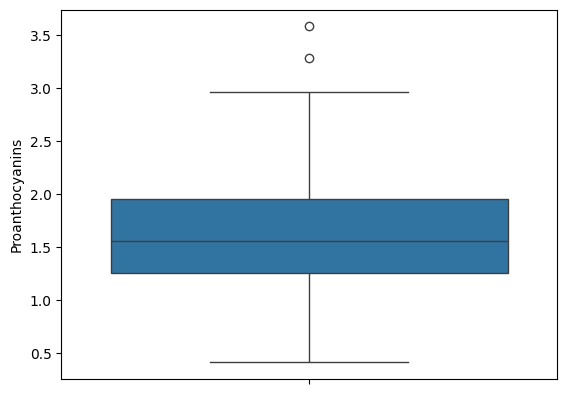

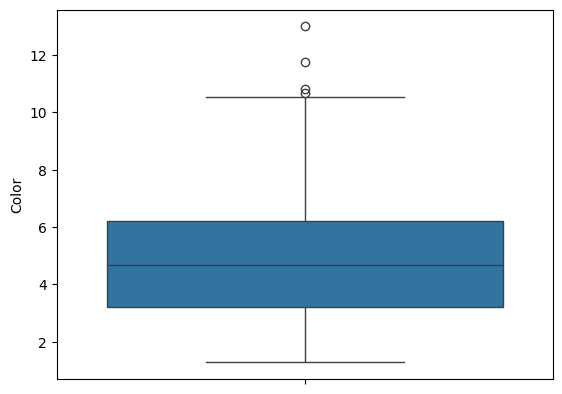

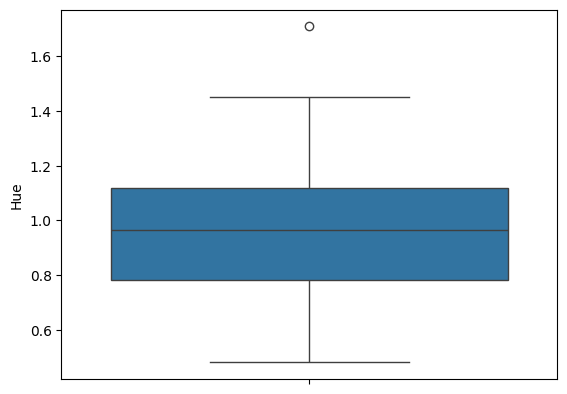

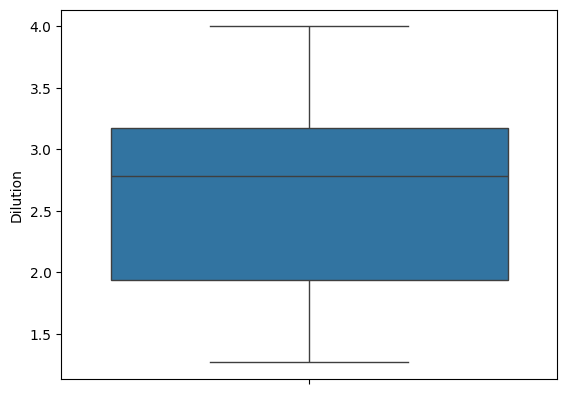

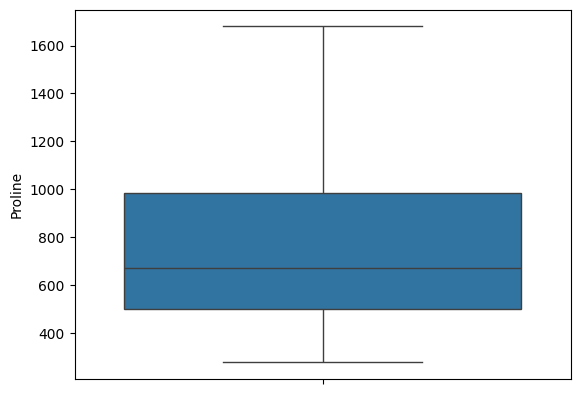

In [454]:
# 2. Checking Outliers


for col in df.select_dtypes(["int", "float"]).columns:
    sns.boxplot(data=df, y=col)
    plt.show()

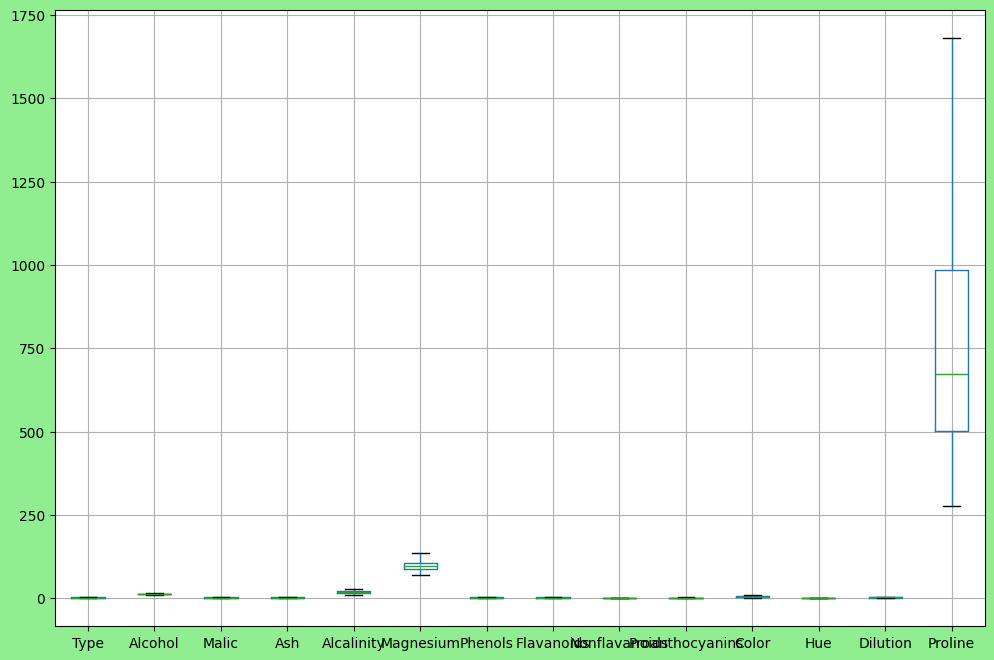

In [455]:
def replace_outliers(df):
    def replace(col):
        Q1 = df[col].quantile(0.25)        
        Q3 = df[col].quantile(0.75)     
        IQR = Q3 - Q1
        lower_extreme = Q1 - 1.5*IQR   
        upper_extreme = Q3 + 1.5*IQR   
        df[col] = df[col].apply(lambda x: lower_extreme if x < lower_extreme else upper_extreme if x > upper_extreme else x)

    for c in df.select_dtypes(include=["int", "float"]).columns:
        replace(c)

plt.figure(figsize=(12,8), facecolor="lightgreen")
replace_outliers(df)
df.boxplot()
plt.show()

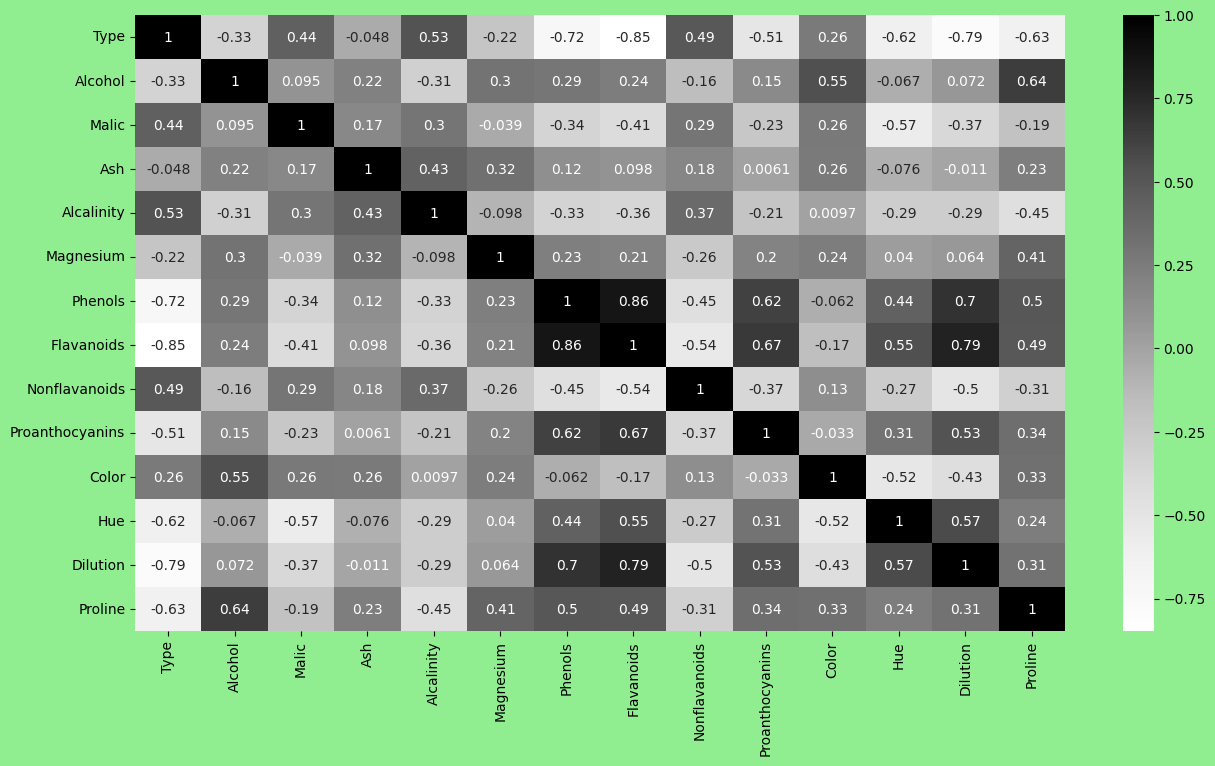

In [456]:
corrs = df.corr()
plt.figure(figsize=(15,8), facecolor="lightgreen")
sns.heatmap(corrs, annot=True, cmap=plt.cm.Greys)
plt.show()

In [457]:
# 3. Data Splitting

features = df.drop(columns=["Type"])
target = df["Type"]

In [458]:
x_train, x_test, y_train, y_test = train_test_split(features, target, train_size=0.8, random_state=100, stratify=df["Type"])
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(142, 13)
(142,)
(36, 13)
(36,)


In [459]:
# 4. Scaling
std_sca = StandardScaler()
cols = df.select_dtypes(["float"]).columns


x_train[cols] = std_sca.fit_transform(x_train[cols])
x_test[cols] = std_sca.transform(x_test[cols])
x_train.head()


,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
94,-1.657794,-0.324786,-0.308917,-0.409492,-0.142468,1.164956,0.230224,-1.547934,-0.423718,-0.800591,0.908924,0.501132,345
63,-0.723591,-1.101006,-0.782400,-0.096364,-0.971275,1.922477,1.069499,-1.387900,0.531620,-0.246846,1.177183,0.374911,420
61,-0.387278,-0.893412,-1.334797,-0.785245,0.008224,-0.413214,-0.619043,1.332677,-1.764865,0.353045,0.104147,-1.420236,450
156,1.107447,1.597712,0.085652,0.060200,-0.820583,-0.760411,-1.198542,0.932592,-0.037908,1.857388,-1.728956,-1.350113,480
28,1.144815,-0.406019,1.742843,0.028887,0.535647,1.054484,0.939611,0.052405,0.329529,-0.223773,1.311312,1.118214,915


# 2. Dimensionailty reduction with PCA

In [460]:
pca = PCA(n_components = 10)

In [ ]:
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
print(x_train_pca.shape)
print(x_test_pca.shape)

(142, 10)
(36, 10)


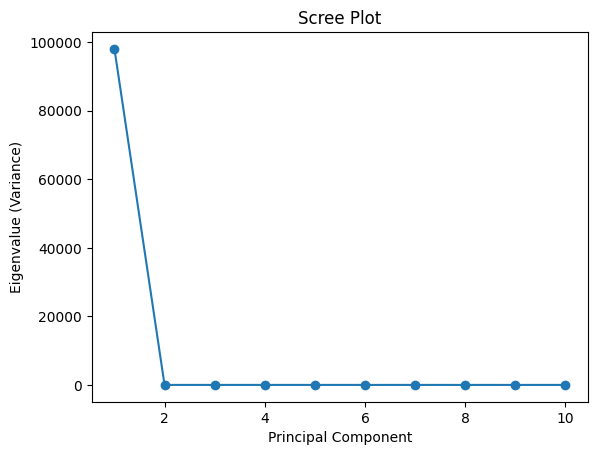

In [462]:
# 1. Scree Plot
plt.plot(range(1, len(pca.explained_variance_)+1),
         pca.explained_variance_,
         marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue (Variance)')
plt.title('Scree Plot')
plt.show()

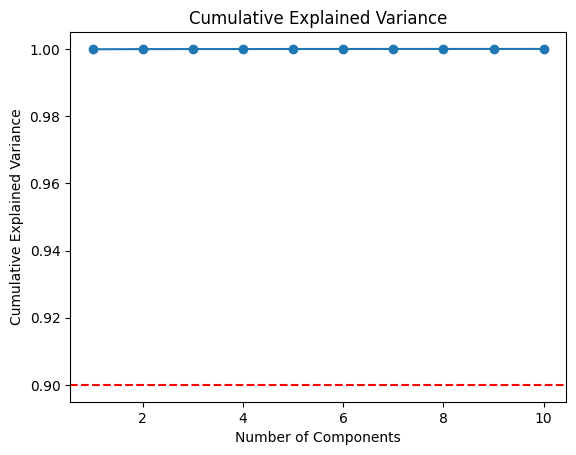

In [463]:
# 1. Cummulative Explained Variance

cum_var = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, len(cum_var)+1),
         cum_var,
         marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.axhline(y=0.90, color='r', linestyle='--')
plt.show()

# 3. Clustering

In [464]:
# 1. Clustering with the original Dataset
kmeans = KMeans(n_clusters=3) 
clusters = kmeans.fit(features)

In [465]:
len(clusters.labels_), np.unique(clusters.labels_)

(178, array([0, 1, 2], dtype=int32))

In [466]:
features["cluster"] = clusters.labels_
features.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


In [467]:
features[features.cluster == 0].shape,features[features.cluster == 1].shape,features[features.cluster == 2].shape

((104, 14), (27, 14), (47, 14))

In [468]:
silhouette_score(features, clusters.labels_)

0.5631970026621579

In [469]:
kmeans.inertia_

2633920.7788469093

In [470]:
inertia_values = []
for i in range(1,11):
    kmeans_ = KMeans(n_clusters=i)
    kmeans_.fit(features)
    inertia_values.append(kmeans_.inertia_)

inertia_values

[17588054.533038747,
 4541734.30635583,
 2633920.7788469093,
 1347909.1599444833,
 912587.0545240794,
 643534.9042457843,
 411028.86938421684,
 320774.0132097965,
 267516.00922089594,
 223004.60697663907]

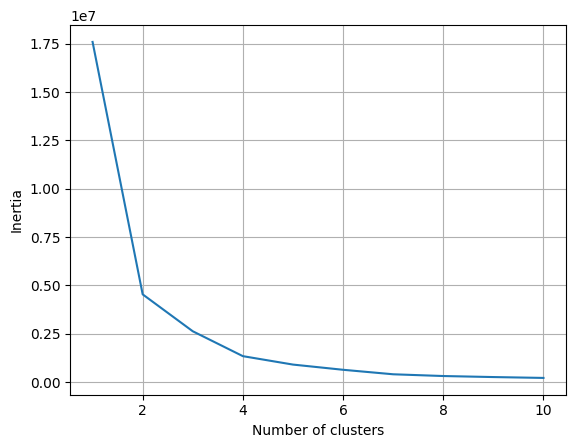

In [471]:
plt.plot(range(1,11),inertia_values)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid()

In [472]:
best_score = float("-inf");
pca_val = 0
clusters_val = 0

for i in range(1,11):
    for j in range(2,11):
        pca = PCA(n_components = i)
        trained = pca.fit_transform(x_train)
        kmeans_check = KMeans(n_clusters=j) 
        clusters_check = kmeans_check.fit(trained)
        score = silhouette_score(trained, clusters_check.labels_)
        if score >= best_score:
            pca_val = i
            clusters_val = j
            best_score = max(best_score,score)

best_score, pca_val, clusters_val

(0.6466079724798139, 1, 2)

In [473]:
# 2. Clustering with PCA transformed Dataset
pca = PCA(n_components = 3)
x_train_pca2 = pca.fit_transform(x_train)
print(x_train_pca2.shape)

(142, 3)


In [474]:
kmeans2 = KMeans(n_clusters=2) 
clusters2 = kmeans2.fit(x_train_pca2)

In [475]:
len(clusters2.labels_), np.unique(clusters2.labels_)

(142, array([0, 1], dtype=int32))

In [476]:
silhouette_score(x_train_pca2, clusters2.labels_)

0.6464280529856287

In [477]:
inertia_values2 = []
for i in range(1,11):
    kmeans_ = KMeans(n_clusters=i)
    kmeans_.fit(x_train_pca2)
    inertia_values2.append(kmeans_.inertia_)

inertia_values2

[13821129.876863848,
 3713010.43961931,
 1814000.6531671528,
 1039811.1506603151,
 738913.3728606252,
 529415.8517482415,
 313561.98895041156,
 278314.1260529763,
 194328.619538682,
 182302.66461455903]

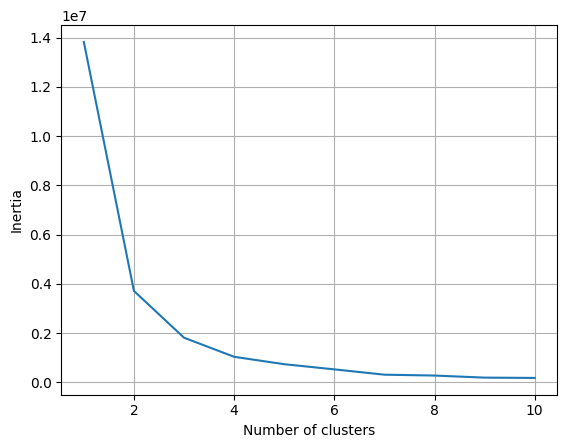

In [478]:
plt.plot(range(1,11),inertia_values2)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid()

In [479]:
# 3. Comparing the result with PCA dataset and original dataset
print("silhouette_score for original dataset = ", silhouette_score(features, clusters.labels_))
print("silhouette_score for PCA dataset = ", silhouette_score(x_train_pca2, clusters2.labels_))


silhouette_score for original dataset =  0.5631970026621579
silhouette_score for PCA dataset =  0.6464280529856287


In [481]:
'''
1) The clustering results after PCA show improved cluster separation, as reflected by a higher silhouette score compared to the original dataset. PCA reduces dimensionality while retaining the most informative variance, which helps distance based algorithms like KMeans perform better. The overall cluster structure remains consistent, indicating that PCA preserves essential patterns. This demonstrates that dimensionality reduction can enhance clustering performance by removing noise and redundancy.


2) Dimensionality reduction with PCA reduces the number of features to use, eventualy adding the essence of the eliminated features' to the features that are retained, this helps to control the overfitting of the model by reducing multicollinearity between features, as the number of features we are using is reduced.


3) Clustering on the original dataset preserves complete feature information and allows direct interpretability but may suffer from noise, feature correlation, and unreliable distance measures in higher dimensions. PCA reduces dimensionality and multicollinearity, often improving clustering performance and computational efficiency. However, PCA can lead to information loss and reduced interpretability since components are linear combinations of features. Thus, PCA offers improved clustering quality at the cost of explainability.
'''

"\n1) The clustering results after PCA show improved cluster separation, as reflected by a higher silhouette score compared to the original dataset. PCA reduces dimensionality while retaining the most informative variance, which helps distance based algorithms like KMeans perform better. The overall cluster structure remains consistent, indicating that PCA preserves essential patterns. This demonstrates that dimensionality reduction can enhance clustering performance by removing noise and redundancy.\n\n\n2) Dimensionality reduction with PCA reduces the number of features to use, eventualy adding the essence of the eliminated features' to the features that are retained, this helps to control the overfitting of the model by reducing multicollinearity between features, as the number of features we are using is reduced.\n\n\n3) Clustering on the original dataset preserves complete feature information and allows direct interpretability but may suffer from noise, feature correlation, and un

In [482]:
'''

Key findings
 - The dataset consisted of multiple continuous, correlated features, making it suitable for Principal Component Analysis (PCA) after proper standardization.

 - PCA revealed that 2–3 principal components were sufficient to capture a large proportion ( ≈ 80–90%) of the total variance, as observed from the scree plot and cumulative explained variance.

 - Clustering performed after PCA generally showed better cluster compactness and separation, reflected by an improved silhouette score compared to clustering on the original dataset.

 - PCA helped reduce noise and multicollinearity, which improved the performance of distance based clustering algorithms like KMeans.

 - However, clustering on the original dataset preserved feature-level interpretability, while PCA-based clustering traded interpretability for better efficiency and performance.

 - The analysis highlighted that PCA is most beneficial when features are correlated and dimensionality is high, whereas clustering directly on the original data is preferable when explainability is a priority.

 - Overall, the assignment demonstrated that combining PCA with clustering can lead to more meaningful and robust clustering results, provided the number of components is chosen carefully.


Recommendations on when to use PCA and when to not
 - Clustering on the original dataset is recommended when interpretability and feature-level insights are required and the dimensionality is manageable. PCA followed by clustering is preferable when the dataset contains correlated features, noise, or high dimensionality, and when improved cluster separation is observed through higher silhouette scores. PCA also enables efficient computation and visualization. The choice should be guided by performance metrics and the need for interpretability
'''

'\n\nKey findings\n - The dataset consisted of multiple continuous, correlated features, making it suitable for Principal Component Analysis (PCA) after proper standardization.\n\n - PCA revealed that 2–3 principal components were sufficient to capture a large proportion ( ≈ 80–90%) of the total variance, as observed from the scree plot and cumulative explained variance.\n\n - Clustering performed after PCA generally showed better cluster compactness and separation, reflected by an improved silhouette score compared to clustering on the original dataset.\n\n - PCA helped reduce noise and multicollinearity, which improved the performance of distance based clustering algorithms like KMeans.\n\n - However, clustering on the original dataset preserved feature-level interpretability, while PCA-based clustering traded interpretability for better efficiency and performance.\n\n - The analysis highlighted that PCA is most beneficial when features are correlated and dimensionality is high, wher